# CUSTOMER CHURN IN TELECOMUNICATION

<img src="https://media.licdn.com/dms/image/C5612AQH0DqxxGFkCvQ/article-cover_image-shrink_720_1280/0/1626825664542?e=1715212800&v=beta&t=-3wL6onvoFSlGgxRkn8ZH5rXP5_e-Jb5HQR1rjsk1QA" alt="churn" width="1000" height="300">


**Author**<br>
Kennedy Owino


## Business Problem
---
Telecommunications companies face significant financial losses due to customer churn, wherein customers discontinue their services prematurely. Identifying and predicting customer churn is crucial for mitigating revenue loss, retaining valuable customers, and optimizing marketing strategies. However, without a comprehensive understanding of the underlying patterns and factors contributing to churn, businesses struggle to implement effective retention measures.
Therefore, the business problem of this revolves around the imperative need to identify and predict customer churn accurately.

## Business Understanding
---
In the competitive landscape of telecommunications, customer retention is paramount for sustained profitability and market growth. The ability to predict and prevent customer churn requires a deep understanding of customer behavior, preferences, and dissatisfaction triggers. By leveraging advanced data analytics and machine learning techniques, businesses can uncover actionable insights from vast amounts of customer data to identify at-risk customers and tailor retention strategies accordingly.<br>

### Key Objectives

$i.$ Develop a predictive model to identify customers at risk of churn based on historical data and relevant features.<br>
$ii.$ Identify significant factors influencing customer churn, including service usage patterns, demographics, contract terms, and customer interactions.<br>

$iii.$ Provide actionable insights to decision-makers for proactive churn management and resource allocation.

### Key Stakeholders
$1.$ **Telecom Executives:** Senior management and decision-makers responsible for devising strategic initiatives to improve customer retention and maximize revenue.<br>

$2.$ **Marketing and Sales Teams:** Teams responsible for implementing customer acquisition and retention campaigns, leveraging insights generated by the predictive model to tailor marketing strategies.<br>

$3.$ **Customer Service Representatives:** Frontline staff tasked with addressing customer concerns and enhancing customer satisfaction to reduce churn rates.<br>

$4.$ **Customers:** Ultimately, the end-users whose experiences and interactions drive churn behavior, and who stand to benefit from improved service offerings and personalized retention efforts.



## Data Understanding
---
The dataset utilized in this project is sourced from SyriaTel published on [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset), encompassing comprehensive customer information. It includes data on customers' state of residence, telephone numbers, and account duration. Additionally, the dataset features columns specifying whether customers have an international plan and voicemail plan, along with details on the number of voicemails received. Furthermore, it encompasses data on the duration of calls, the frequency of calls made, and the corresponding charges incurred during the day, evening, and night periods.

## Exploratory Data Analysis
---

In [2]:
#importing necessary packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocesing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#model packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#metrics
from sklearn.metrics import log_loss, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

#filtering out future warnings
import warnings
warnings.filterwarnings(action= 'ignore', category= FutureWarning)

In [3]:
#importing the dataset
filepath = 'data/syriateldataset.csv'
data = pd.read_csv(filepath)

#viewing the first 5 rows
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#viewing the shape
data.shape

(3333, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the information above, it is noted that there are no missing values in the dataset.

The decision to drop the phone number is based on its uniqueness for each customer. While both the state and area code provide information about the location of the customer's account, it is deemed sufficient to retain only the state information for the project. As a result, the area code will be dropped from the dataset.

In [6]:
#dropping the phone number and area code.

data.drop(columns=['phone number', 'area code'], inplace= True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [9]:
#partioning the data into categorical and numerical variables
categorical_data = data.select_dtypes('object')

numerical_data = data.select_dtypes('number')


In [10]:
#checking the descriptive statistics for numerical data

numerical_data.describe().T


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total night calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


In [12]:
#viewing the cthe remaining columns
numerical_data.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

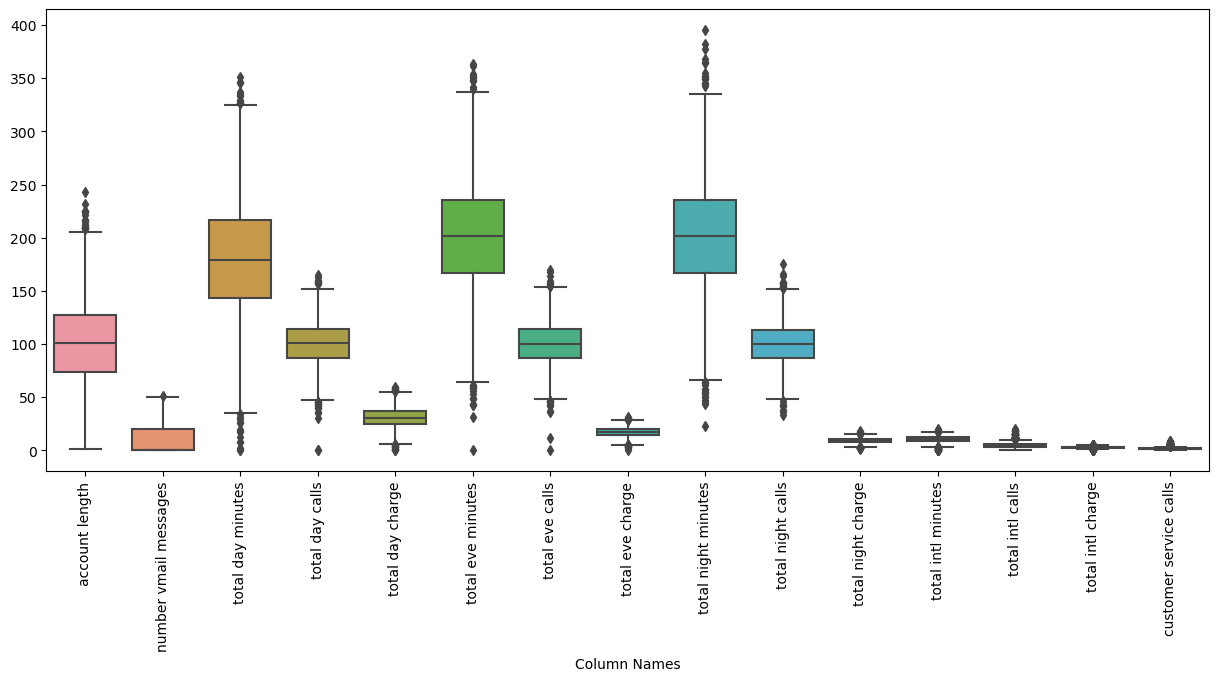

In [13]:
#plotting the box plots for each column to understand the distribution of the data 
#and any outlier influence

fig, ax = plt.subplots(figsize = (15, 6))

#create a boxplot of columns
sns.boxplot(numerical_data)

# Set the x-axis tick labels
ax.set_xticklabels(numerical_data.columns, rotation= 90)

# Set the x-axis label
ax.set_xlabel('Column Names');



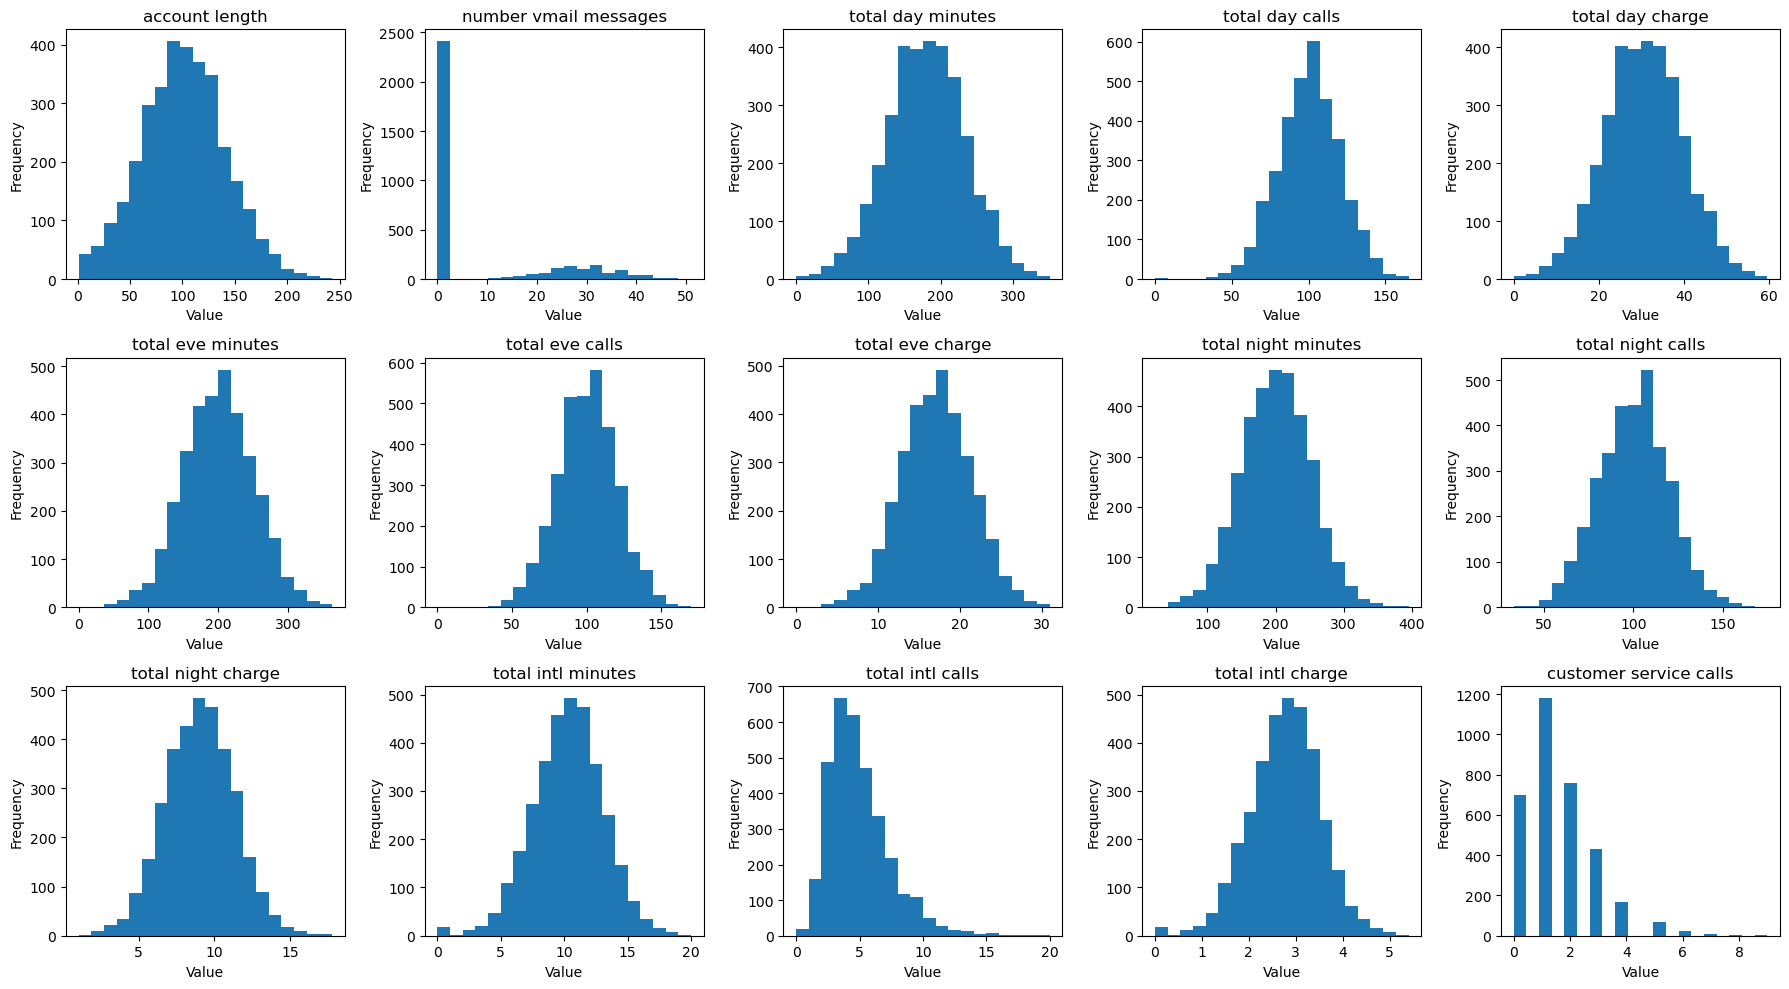

In [14]:
#Plotting histograms of the features to understand their distribution
fig, axs = plt.subplots(ncols=5,nrows=3, figsize=(18, 10))

for i, col in enumerate(numerical_data.columns):
    ax = axs[i // 5, i % 5]
    ax.hist(numerical_data[col], bins=20)  
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

Based on the boxplots and histogram plots generated for the dataset above, it's observed that the majority of features exhibit approximately normal distributions with minimal presence of outliers. However, a notable exception is the `number of vmail messages` feature, which displays approximately negatively skewed distribution.


In [15]:
#checking the categorical features
categorical_data.head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


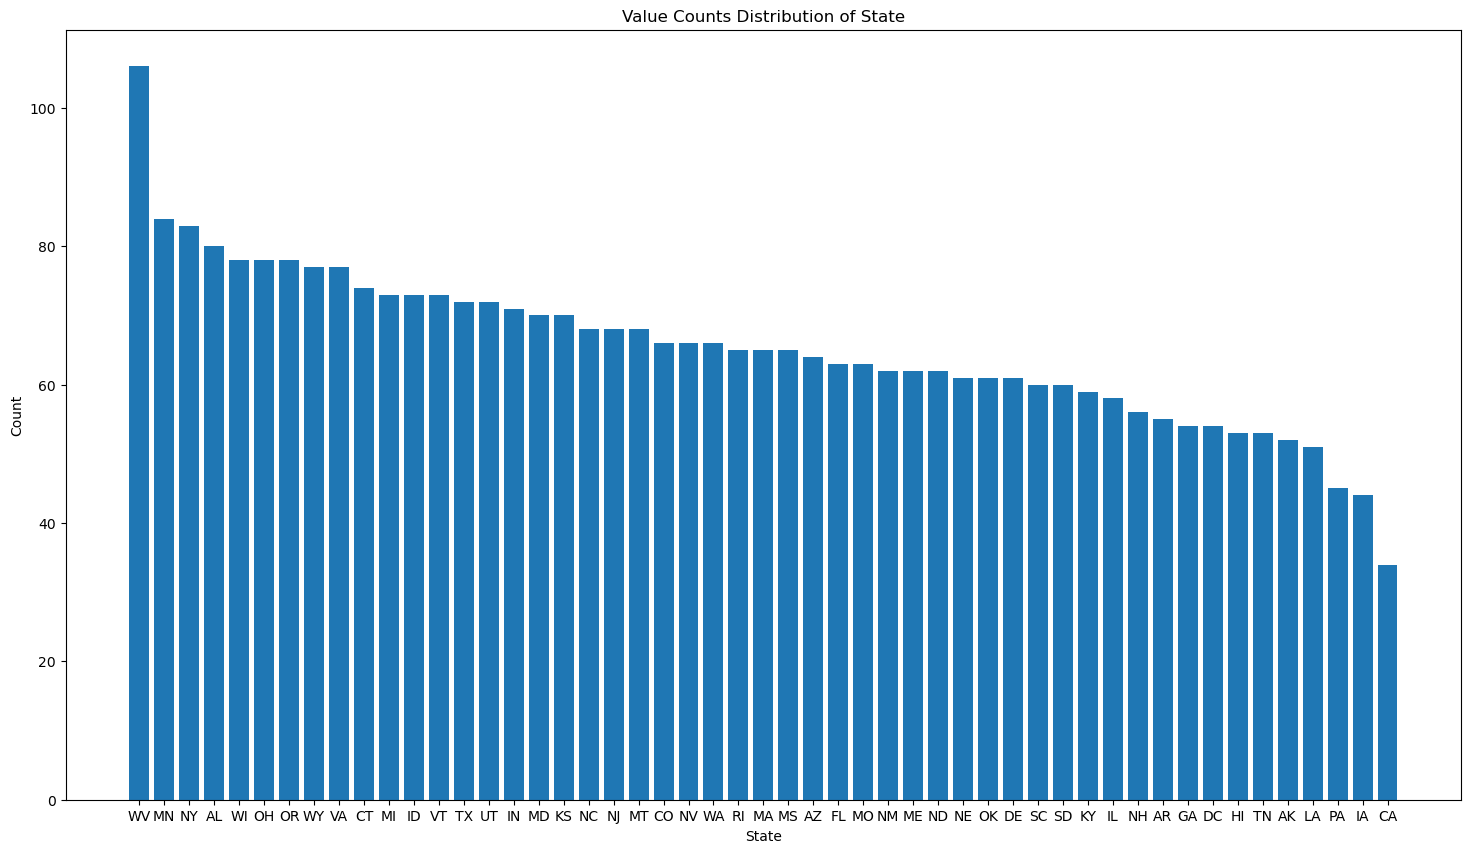

In [20]:
#ploting the distribution of states
fig, ax = plt.subplots(figsize= (18, 10))
#assigning state names to x and their values to y
x = categorical_data['state'].value_counts().index
y = categorical_data['state'].value_counts().values

#ploting the results
ax.bar(x, y)
ax.set_title('Value Counts Distribution of State')
ax.set_xlabel('State')
ax.set_ylabel('Count')
plt.show()

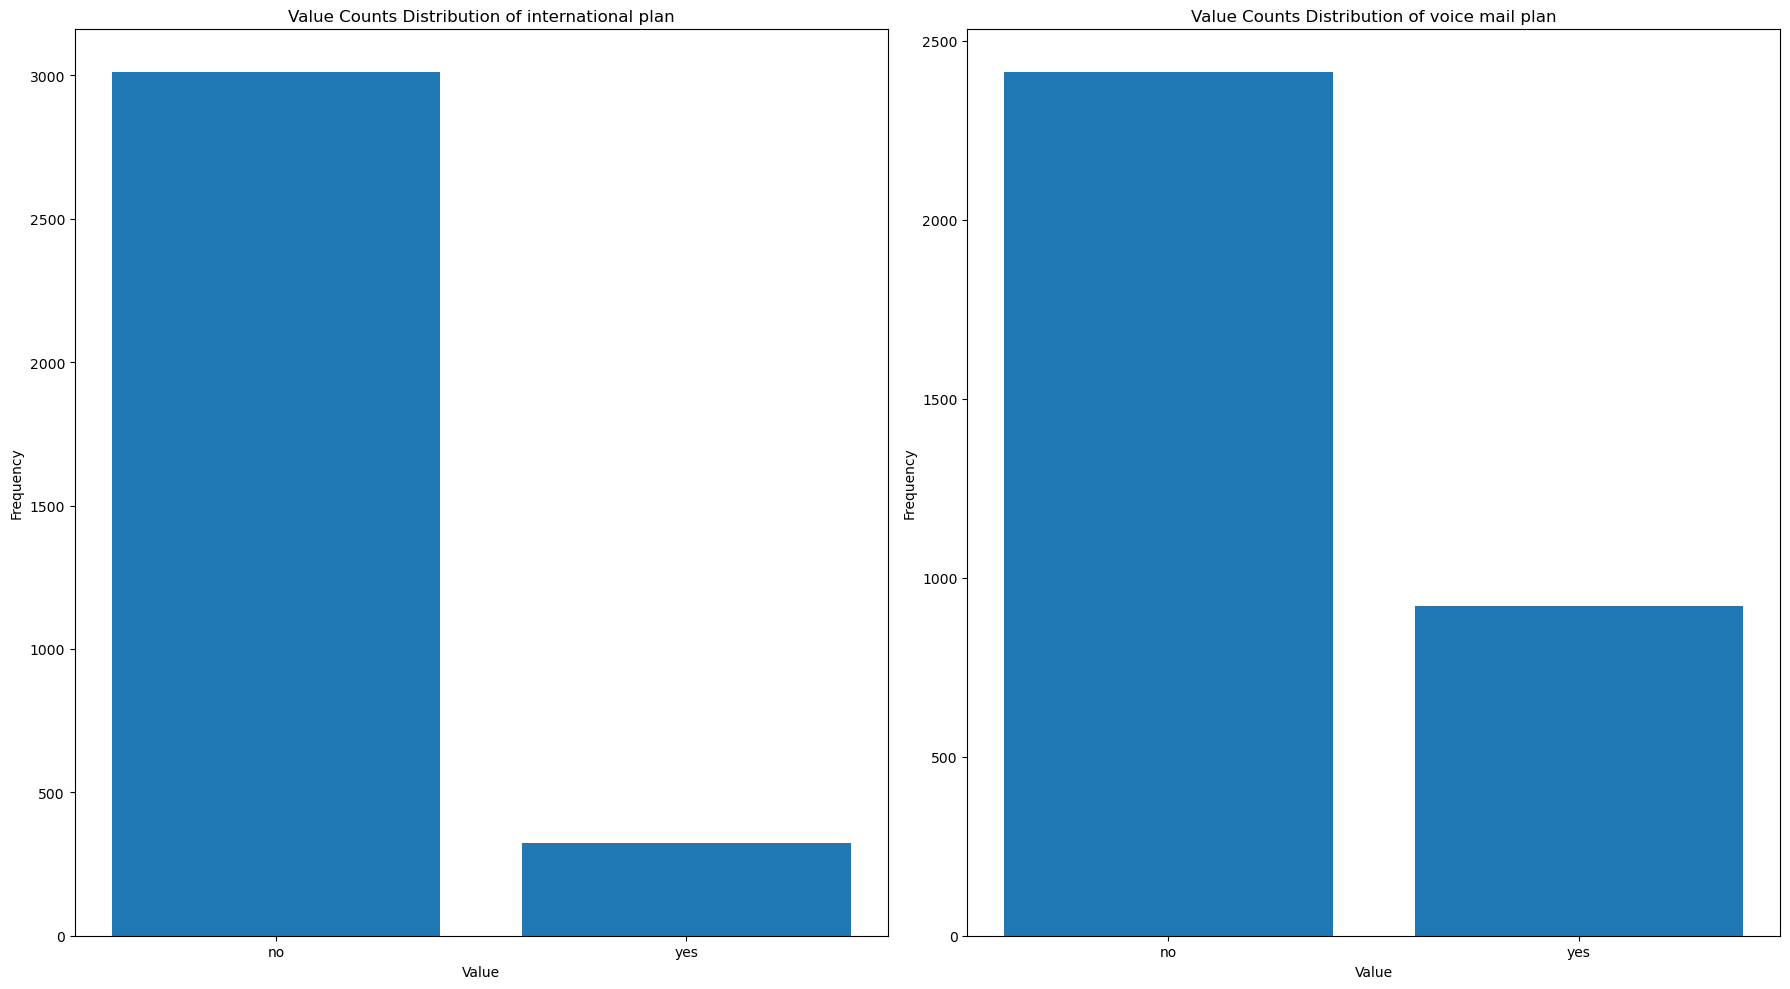

In [17]:
#ploting the class weight for the remaining categorical features

fig, axs = plt.subplots(ncols=2, figsize=(18, 10))

for i, col in enumerate(categorical_data.columns.difference(['state'])):

    ##assigning class to x and their values to y

    x = categorical_data[col].value_counts().index
    y = categorical_data[col].value_counts().values

    ax = axs[i]

    ax.bar(x, y)
    #set title and label axes
    ax.set_title(f'Value Counts Distribution of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()
    


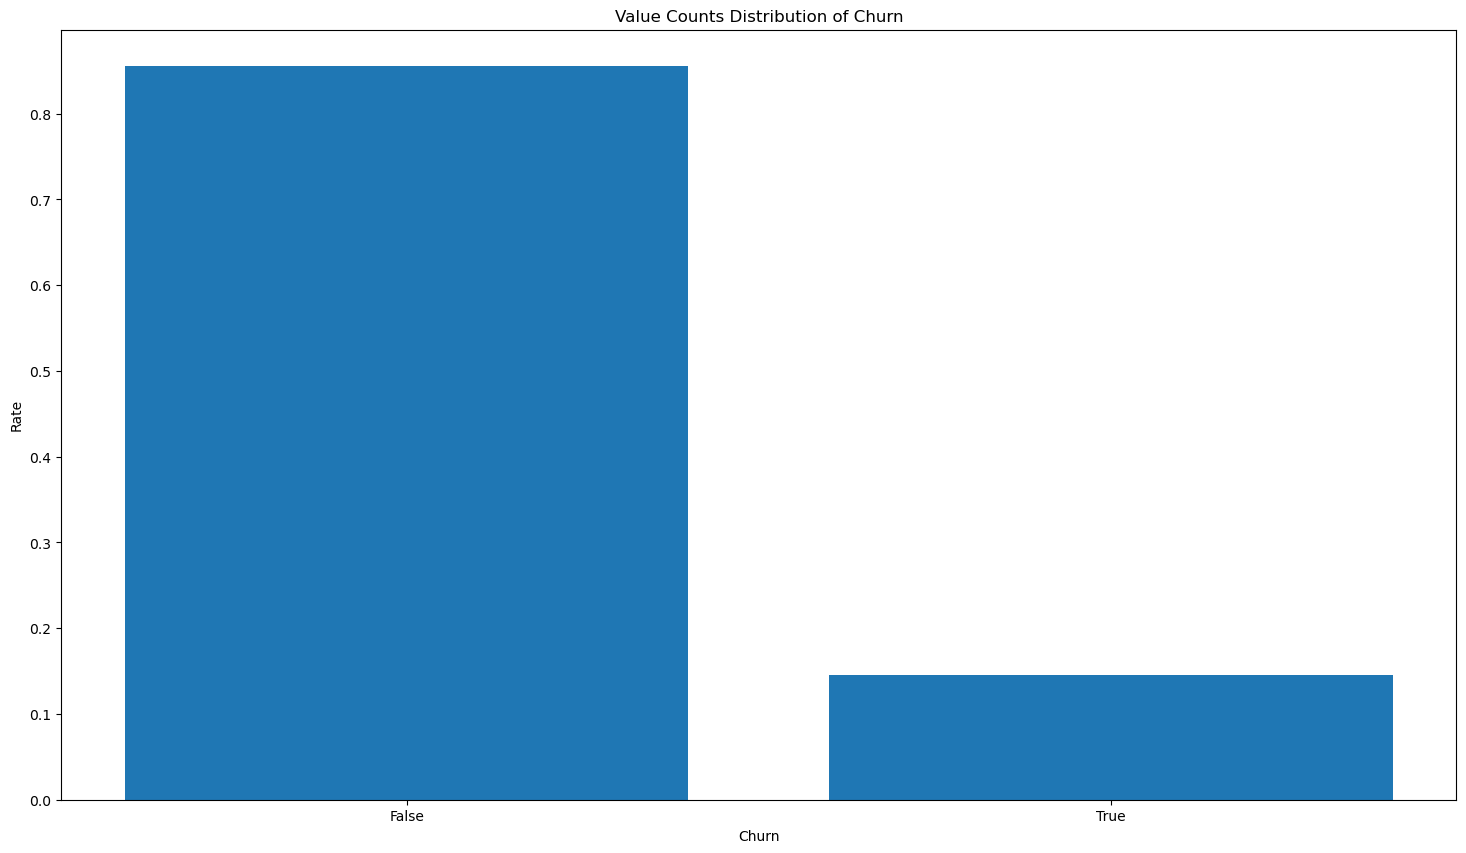

In [19]:
#checking the distribution of churn
fig, ax = plt.subplots(figsize=(18, 10))

x = data['churn'].value_counts().index
y = data['churn'].value_counts(normalize= True).values

# Plotting the results
ax.bar(x, y)
ax.set_title('Value Counts Distribution of Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Rate')

# Set the tick positions and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(x)

plt.show()


The dataset exhibits a significant class imbalance in the target variable, with approximately 85% of the records corresponding to customers who wouldn't churn (class 0).<br>
 Consequently, a simplistic model that consistently predicts non-churn (class 0) for all instances would achieve an accuracy of approximately 85%. The accuracy, while seemingly high, may be misleading due to the imbalanced nature of the dataset.

## Data Preprocessing and Modeling

In [21]:
#partioning the data into target and features
#target
y = data['churn'].astype(int)
#features
X = data[data.columns.difference(['churn'])]

X.head()

,account length,customer service calls,international plan,number vmail messages,state,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes,voice mail plan
0,128,1,no,25,KS,110,45.07,265.1,99,16.78,197.4,3,2.70,10.0,91,11.01,244.7,yes
1,107,1,no,26,OH,123,27.47,161.6,103,16.62,195.5,3,3.70,13.7,103,11.45,254.4,yes
2,137,0,no,0,NJ,114,41.38,243.4,110,10.30,121.2,5,3.29,12.2,104,7.32,162.6,no
3,84,2,yes,0,OH,71,50.90,299.4,88,5.26,61.9,7,1.78,6.6,89,8.86,196.9,no
4,75,3,yes,0,OK,113,28.34,166.7,122,12.61,148.3,3,2.73,10.1,121,8.41,186.9,no


In [22]:
#spliting the data to train and test samples
#setting seed for reproducibility
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= seed, test_size= 30)

In [23]:
categorical_cols = ['state','international plan', 'voice mail plan']

numerical_cols = X_train.columns.difference(categorical_cols)

In [24]:
#first 3 rows of X_train
X_train.head(3)

,account length,customer service calls,international plan,number vmail messages,state,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes,voice mail plan
693,92,3,no,29,NJ,110,26.42,155.4,104,16.02,188.5,4,2.16,8.0,118,11.47,254.9,yes
51,60,1,no,0,IN,57,37.50,220.6,115,17.94,211.1,3,1.84,6.8,129,11.21,249.0,no
811,58,0,no,0,FL,89,39.92,234.8,131,9.08,106.8,6,2.67,9.9,122,8.03,178.5,no


In [25]:
# intstantiating the ColumnTransformer to apply OneHotEncoder only to categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse= False), categorical_cols)
    ],
    remainder='passthrough'  # Pass through numerical columns unchanged
)

# Define the pipeline
ohe_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_encoded = ohe_pipeline.fit_transform(X_train)

#cheking the shape of the results
X_train_encoded.shape

(3303, 70)

In [27]:
#scaling the dataset to be on the same scale to minize the penalty on columns with higher scales. 
scaler = StandardScaler()

#fit transform the X_train encoded
X_train_scaled = scaler.fit_transform(X_train_encoded)

#checking the shape of the result
X_train_scaled.shape

(3303, 70)

**Baseline Model**

In [28]:
#baseline logistic model

baseline_model = LogisticRegression(random_state= seed)

#evaluating the performance of the model on training set

baseline_accuracy = np.mean(cross_val_score(baseline_model, X_train_scaled, y_train))

print('Baseline model accuracy:', baseline_accuracy)

Baseline model accuracy: 0.8616366387016916


If there was a model that just chose 0 (the majority class) every time, this is the accuracy it would have:

In [82]:
accuracy_score(y_train, np.zeros(len(y_train)))

0.8546775658492279

Based on the accuracy score, the baseline model represents a slight improvement over random guessing, where the majority class is predicted for every instance. <br>
Moving forward, in subsequent models developed for this project, achieving an accuracy score of 86% will serve as the reference point to assess whether the models demonstrate improvement or not.

**Solving the class Imbalance on Training set**


In [29]:
#solving the class imbalance
smote_ = SMOTE(random_state= seed)

X_train_resampled, y_train_resampled = smote_.fit_resample(X_train_scaled, y_train)

print(y_train_resampled.value_counts())
X_train_resampled.shape

churn
0    2823
1    2823
Name: count, dtype: int64


(5646, 70)

In [30]:
log_model2 = LogisticRegression(random_state= seed)

log_model2_accuracy = np.mean(cross_val_score(log_model2, X_train_resampled, y_train_resampled))

print('Training Accuracy with classes resampled:', log_model2_accuracy)

Training Accuracy with classes resampled: 0.7876383674173245


**Is the model overfitting?**

To examine this, model performance was evaluated with the test set, which was not resampled but rather left as it is.

In [31]:
#creating a pipeline to combine onehotencoding and scaling steps

preprocessor_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Specify the name for the preprocessor step
    ('scaler', StandardScaler()),    # StandardScaler for numerical columns
])

In [32]:
#Transforming the test set to compare the performance of the model.
X_train_transformed = preprocessor_pipeline.fit_transform(X_train)

X_test_transformed = preprocessor_pipeline.transform(X_test)

#resample the X_train_transformed

smote_ = SMOTE(random_state= seed)

X_train_resampled, y_train_resampled = smote_.fit_resample(X_train_transformed, y_train)

#fit the model on training set
log_model2 = LogisticRegression(random_state= seed)

log_model2_accuracy = cross_val_score(log_model2, X_train_resampled, y_train_resampled, cv= 3).mean()

print('Training:', log_model2_accuracy)
print('Validation scores:', cross_val_score(log_model2, X_test_transformed, y_test, cv= 3).mean() )

Training: 0.785688983351045
Validation scores: 0.8666666666666667


Overfitting would be indicated by significantly better scores on the training data than the validation data. However, better metric is observed on the validation data (where synthetic examples have not been added), suggesting that overfitting is not apparent.

However, it is observed that the model is not significantly better than the baseline model. Therefore, exploration of Decision Trees is undertaken to identify a model with improved accuracy compared to the baseline model.

In [33]:
#Exploring decision tree classifier to check if producess a better model than baseline.

d_t = DecisionTreeClassifier(random_state= seed, criterion= 'entropy')

d_t.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [34]:
#making predictions with the model

train_pred = d_t.predict(X_train_resampled)

y_pred = d_t.predict(X_test_transformed)

Train Accuracy is :100.0
Test Accuracy is :93.33333333333333

AUC is :0.96

Confusion Matrix
----------------


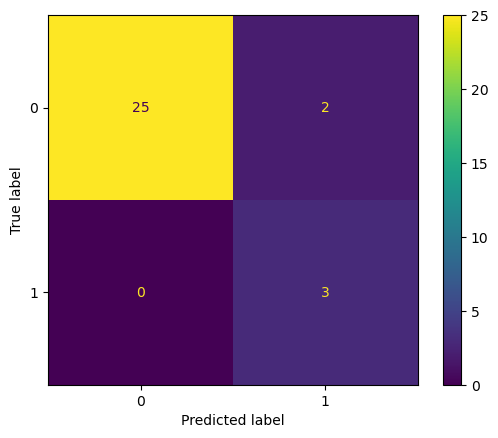

In [35]:
# Calculating accuracy
train_acc = accuracy_score(y_train_resampled, train_pred) * 100
accuracy_ = accuracy_score(y_test,y_pred) * 100
print('Train Accuracy is :{0}'.format(train_acc))
print('Test Accuracy is :{0}'.format(accuracy_))


# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and plotting a confusion matrix 
print('\nConfusion Matrix')
print('----------------')

conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_mat)

disp.plot();

In [36]:
#performing cross validation 

print('Training set:', cross_val_score(d_t, X_train_resampled, y_train_resampled, cv = 3))

print('Validation set:', cross_val_score(d_t, X_test_transformed, y_test, cv= 3))

Training set: [0.89479277 0.91551541 0.92879915]
Validation set: [0.9 0.6 0.9]


The cross-validation scores reveal that the decision tree model performs exceptionally well on the training set but poorly on the test set. This discrepancy suggests potential overfitting, where the model generalizes poorly to unseen data. To address this issue, hyperparameter tuning is conducted in an attempt to enhance the model's performance on the test set.

**Tree Model Tuning**

In [37]:
#defining parameters for tuning
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_leaf': [2, 3, 5, 10]
}

In [39]:
#performing grid search to identify the best combination of parameters

gs_dt = GridSearchCV(estimator= d_t,
                     param_grid= params,
                     cv= 5,
                     scoring= 'accuracy')

#fit the data to the grid search
gs_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [2, 3, 5, 10]},
             scoring='accuracy')

In [40]:
#identifying the best parameters
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3}

In [41]:
# model with optimal parameters

gs_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       random_state=42)

In [42]:
#making prediction  with the best estimator
gs_dt_train_pred = gs_dt.best_estimator_.predict(X_train_resampled)

gs_dt_y_pred = gs_dt.best_estimator_.predict(X_test_transformed)

In [43]:
#evaluting the pafermance of the best estimator on both training and test sets
# Calculate accuracy
train_acc = accuracy_score(y_train_resampled, gs_dt_train_pred) * 100
accuracy_ = accuracy_score(y_test, gs_dt_y_pred) * 100
print('Train Accuracy is :{0}'.format(train_acc))
print('Test Accuracy is :{0}'.format(accuracy_))


# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gs_dt_y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


Train Accuracy is :95.5366631243358
Test Accuracy is :93.33333333333333

AUC is :0.96


In [45]:
#performing cross validation for the best estimator

print('Training set:', cross_val_score(gs_dt.best_estimator_, X_train_resampled, y_train_resampled, cv = 3))

print('Validation set:', cross_val_score(gs_dt.best_estimator_, X_test_transformed, y_test, cv= 3))

Training set: [0.89426142 0.90967056 0.9325186 ]
Validation set: [0.9 0.9 0.9]


The optimized model demonstrated exceptional performance on both the training set and test dataset. Notably, the cross-validated score saw a marginal improvement on the test dataset, averaging approximately 10%. Moreover, there appears to be a slight reduction in the issue of overfitting, as the performance on both the training set and test set is not significantly different.

However, to further explore the potential for improvement an ensemble model,that is, Random Forest is considered to potentially achieve even better performance in terms of cross-validated scores.

**Ensemble Model (Random Forest)**

In [47]:
#instatiating the random forest
forest = RandomForestClassifier(random_state= seed)

forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [48]:
#Evaluating the performance on the training set
mean_rf_cv_score = np.mean(cross_val_score(forest, X_train_resampled, y_train_resampled, cv=3))

print(
    f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}"
)

Mean Cross Validation Score for Random Forest Classifier: 92.86%


An improvement in the mean cross-validated scores is observed compared to the optimized decision tree model. However, to further explore the potential for achieving optimal performance, a grid search is performed to identify the best combinations of hyperparameters. 

This approach aims to systematically assess various hyperparameter configurations to optimize the model's performance.

**Parameter Tuning**

In [49]:
#defining parameter grid for GridSearchCv
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
}

In [50]:
#performing grid seach to find the optimal hyperparemeters

rf_grid_search = GridSearchCV(estimator= forest,
                              param_grid= rf_param_grid,
                              cv= 3)

rf_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 30, 100]})

In [51]:
print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 91.87%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [52]:
#extracting the best estimator
rf_grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5, random_state=42)

In [177]:
#Making predictions on the test set wih best estimator

rf_y_pred = rf_grid_search.best_estimator_.predict(X_test_transformed)

print('Test Accuracy:', accuracy_score(y_test, rf_y_pred) * 100)

Test Accuracy: 96.66666666666667


In [54]:
#Evaluating the full model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):

    #make predictions on train set
    y_train_pred = model.predict(X_train)

    #make prediction on test set
    y_test_pred = model.predict(X_test)

    #Evaluate model performance
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Training Accuracy: {train_accuracy}')
    print(f'Validation Accuracy: {test_accuracy}')

    print('---------------------------------------------')
    #calculating recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print(f'Training Recall: {train_recall}')
    print(f'Validation Recall: {test_recall}')

    print('----------------------------------------------')
    #calculating precision

    print(f'Training Precision: {precision_score(y_train, y_train_pred)}')
    print(f'Validation Precision: {precision_score(y_test, y_test_pred)}')

    print('-----------------------------------------------')

    #calculating F1 score

    print(f'Training F1-score: {f1_score(y_train, y_train_pred)}')
    print(f'Validation F1-score: {f1_score(y_test, y_test_pred)}')

    print('-----------------------------------------------')

    #calculation roc-auc

    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
    print('\n Training AUC is :{0}'.format(round(roc_auc_train, 2)))

    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    print('\n Validation AUC is :{0}'.format(round(roc_auc_test, 2)))

    print('-----------------------------------------------')

    # Creating and plotting a confusion matrix 
    print('\nTest Confusion Matrix')
    print('----------------')

    conf_mat = confusion_matrix(y_test, y_test_pred)

    disp = ConfusionMatrixDisplay(conf_mat)

    disp.plot();


Training Accuracy: 0.9831739284449168
Validation Accuracy: 0.9666666666666667
---------------------------------------------
Training Recall: 0.9737867516826072
Validation Recall: 1.0
----------------------------------------------
Training Precision: 0.9924187725631769
Validation Precision: 0.75
-----------------------------------------------
Training F1-score: 0.9830144823887002
Validation F1-score: 0.8571428571428571
-----------------------------------------------

 Training AUC is :0.98

 Validation AUC is :0.98
-----------------------------------------------

Test Confusion Matrix
----------------


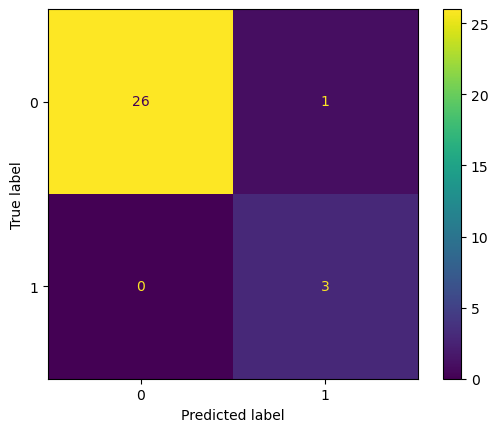

In [55]:
#applying the function to the random forest best estimator.

evaluate_model(model= rf_grid_search.best_estimator_,
               X_train= X_train_resampled,
               y_train= y_train_resampled,
               X_test= X_test_transformed,
               y_test= y_test)

In [56]:
#feature importance
rf_grid_search.best_estimator_.feature_importances_

array([0.00032837, 0.00041059, 0.00048622, 0.000893  , 0.00062034,
       0.00037192, 0.00061639, 0.00146279, 0.00044912, 0.00066717,
       0.00017289, 0.00040954, 0.00037331, 0.00098764, 0.00067655,
       0.00151824, 0.00036511, 0.00039687, 0.00051349, 0.00094202,
       0.00049151, 0.00229445, 0.0005231 , 0.00054158, 0.00051348,
       0.00274506, 0.00193536, 0.00052915, 0.00065579, 0.00043842,
       0.00043718, 0.00219868, 0.00035424, 0.0008241 , 0.00199871,
       0.00133546, 0.00104869, 0.0006998 , 0.0002415 , 0.00045836,
       0.00124728, 0.00098695, 0.0004829 , 0.002305  , 0.00136474,
       0.00116567, 0.00056383, 0.00058204, 0.0004734 , 0.00091809,
       0.00074365, 0.05788196, 0.05877112, 0.05216455, 0.05006502,
       0.02532321, 0.14252138, 0.03552622, 0.0245968 , 0.09706305,
       0.10264444, 0.0233866 , 0.04405342, 0.04287986, 0.05121756,
       0.03105035, 0.03045416, 0.02252374, 0.03103629, 0.03308052])